# Ultrasound propagation in shallow pond

Jupiter notebook specific imports

In [1]:
import os
os.chdir('../../../')
import warnings
warnings.filterwarnings('ignore')

PyWaveProp imports

In [2]:
from uwa.source import GaussSource
from uwa.environment import UnderwaterEnvironment, Bathymetry, sound_speed_mps
from uwa.sspade import UWASSpadeComputationalParams, uwa_ss_pade
from uwa.vis import AcousticPressureFieldVisualiser2d
from scipy.interpolate import interp1d

Preparing environment

In [3]:
max_range_m = 100
env = UnderwaterEnvironment(
    sound_speed_profile_m_s=lambda x, z: 1500,
    bottom_profile=Bathymetry(
        ranges_m=[0, max_range_m],
        depths_m=[4, 1]),
    bottom_sound_speed_m_s = 1700,
    bottom_density_g_cm = 1.5,
    bottom_attenuation_dm_lambda = 0.1
)

## Horizontally oriented antenna pattern

Preparing transmitting antenna

In [4]:
src = GaussSource(
    freq_hz=31.4E3,
    depth_m=2,
    beam_width_deg=20,
    elevation_angle_deg=0,
    multiplier=0.1
)

Calculating the acoustics pressure field

In [5]:
params = UWASSpadeComputationalParams(
    max_range_m=max_range_m,
    max_depth_m=6,
    dx_m=0.1, # output grid steps affects only on the resulting field, NOT the computational grid
    dz_m=0.1,
    precision=0.1
)

In [6]:
field1 = uwa_ss_pade(
    src=src,
    env=env,
    params=params
)

Visualising the results

Two dimensional distribution of the field amplitude

In [7]:
vis1 = AcousticPressureFieldVisualiser2d(field=field1, env=env, label="Horizontal")

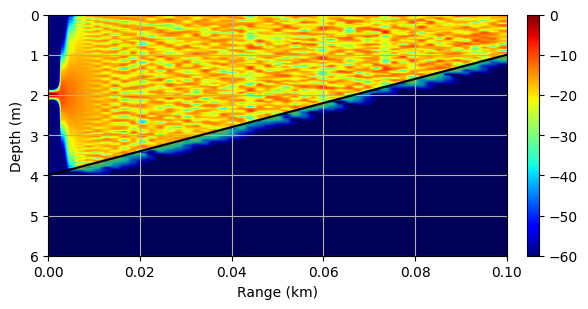

In [8]:
vis1.plot2d(min_val=-60, max_val=0, grid=True, show_terrain=True).show()

## 60 deg. elevation angle

In [9]:
src.elevation_angle_deg = -60

In [10]:
field2 = uwa_ss_pade(
    src=src,
    env=env,
    params=params
)

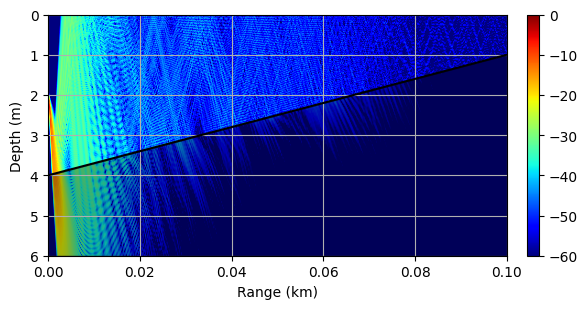

In [11]:
vis2 = AcousticPressureFieldVisualiser2d(field=field2, env=env, label="Vertical")
vis2.plot2d(min_val=-60, max_val=0, grid=True, show_terrain=True).show()

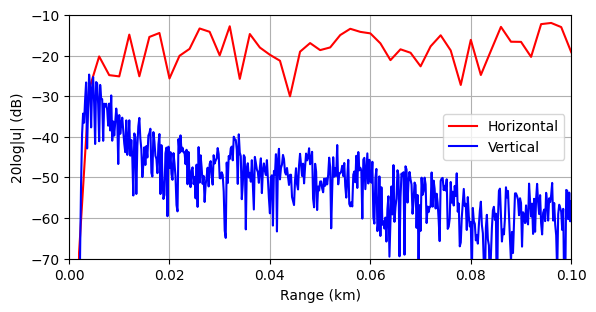

In [12]:
vis1.plot_hor(0.5, [-70, -10], vis2).show()

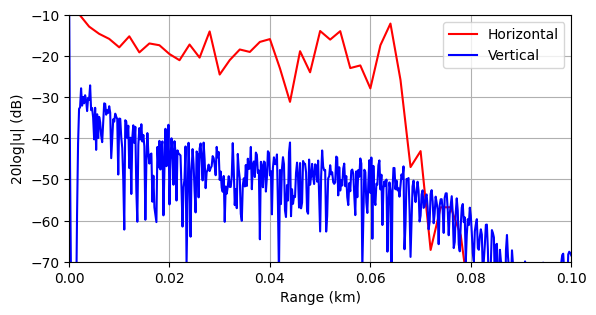

In [14]:
vis1.plot_hor(2, [-70, -10], vis2).show()